<a href="https://colab.research.google.com/github/Malekkamoua/PFE/blob/main/5_Forecasting%20%7C%20ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


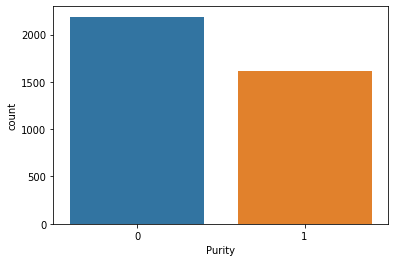

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Datascience/PFE/datasets/final.csv', parse_dates=['dates'],  index_col='dates',infer_datetime_format=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

sns.countplot(x ='Purity', data = df)
plt.show()

In [ ]:
df

,% Silica Feed,Amina Flow,Flotation Column 01 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 02 Level,Flotation Column 03 Level,% Iron Concentrate,% Silica Concentrate,Purity
dates,,,,,,,,,,
2017-03-10 01:00:00,16.98,578.910104,251.177960,250.175988,295.096000,446.972364,450.622040,66.91,1.31,1
2017-03-10 02:00:00,16.98,537.219661,249.880589,250.033317,295.096000,450.249356,450.081222,67.06,1.11,1
2017-03-10 03:00:00,16.98,591.906744,250.161328,250.046350,295.096000,450.868711,450.901822,66.97,1.27,1
2017-03-10 04:00:00,16.98,593.170106,250.208772,250.120861,295.096000,491.462111,487.387206,66.75,1.36,1
2017-03-10 05:00:00,16.98,619.710806,249.917800,250.013500,295.096000,549.983156,549.459572,66.63,1.34,1
...,...,...,...,...,...,...,...,...,...,...
2017-09-09 19:00:00,23.20,498.785884,301.432594,299.756449,299.929000,497.870623,409.189681,65.05,1.65,1
2017-09-09 20:00:00,23.20,510.780566,300.181000,299.593867,299.526313,498.402434,392.437663,64.83,1.71,1
2017-09-09 21:00:00,23.20,519.289535,299.419465,299.995958,299.767268,500.891915,459.091225,64.29,1.80,1


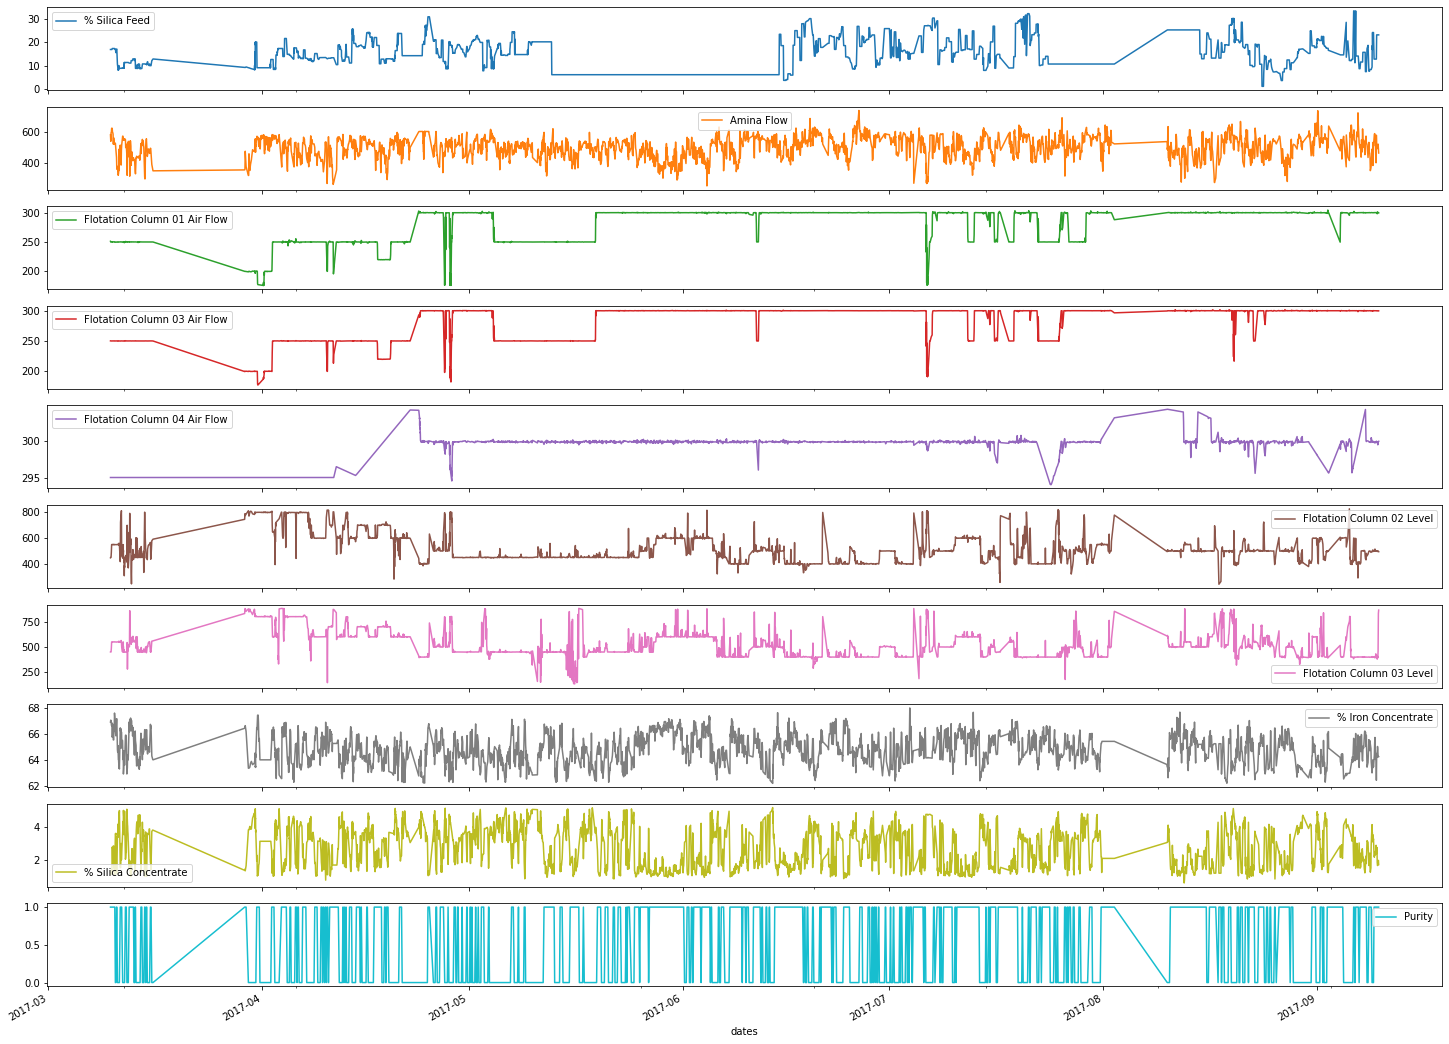

In [ ]:
plot_cols = df.columns
plot_features = df[plot_cols]
plot_features.plot(subplots=True, figsize=(25,20));

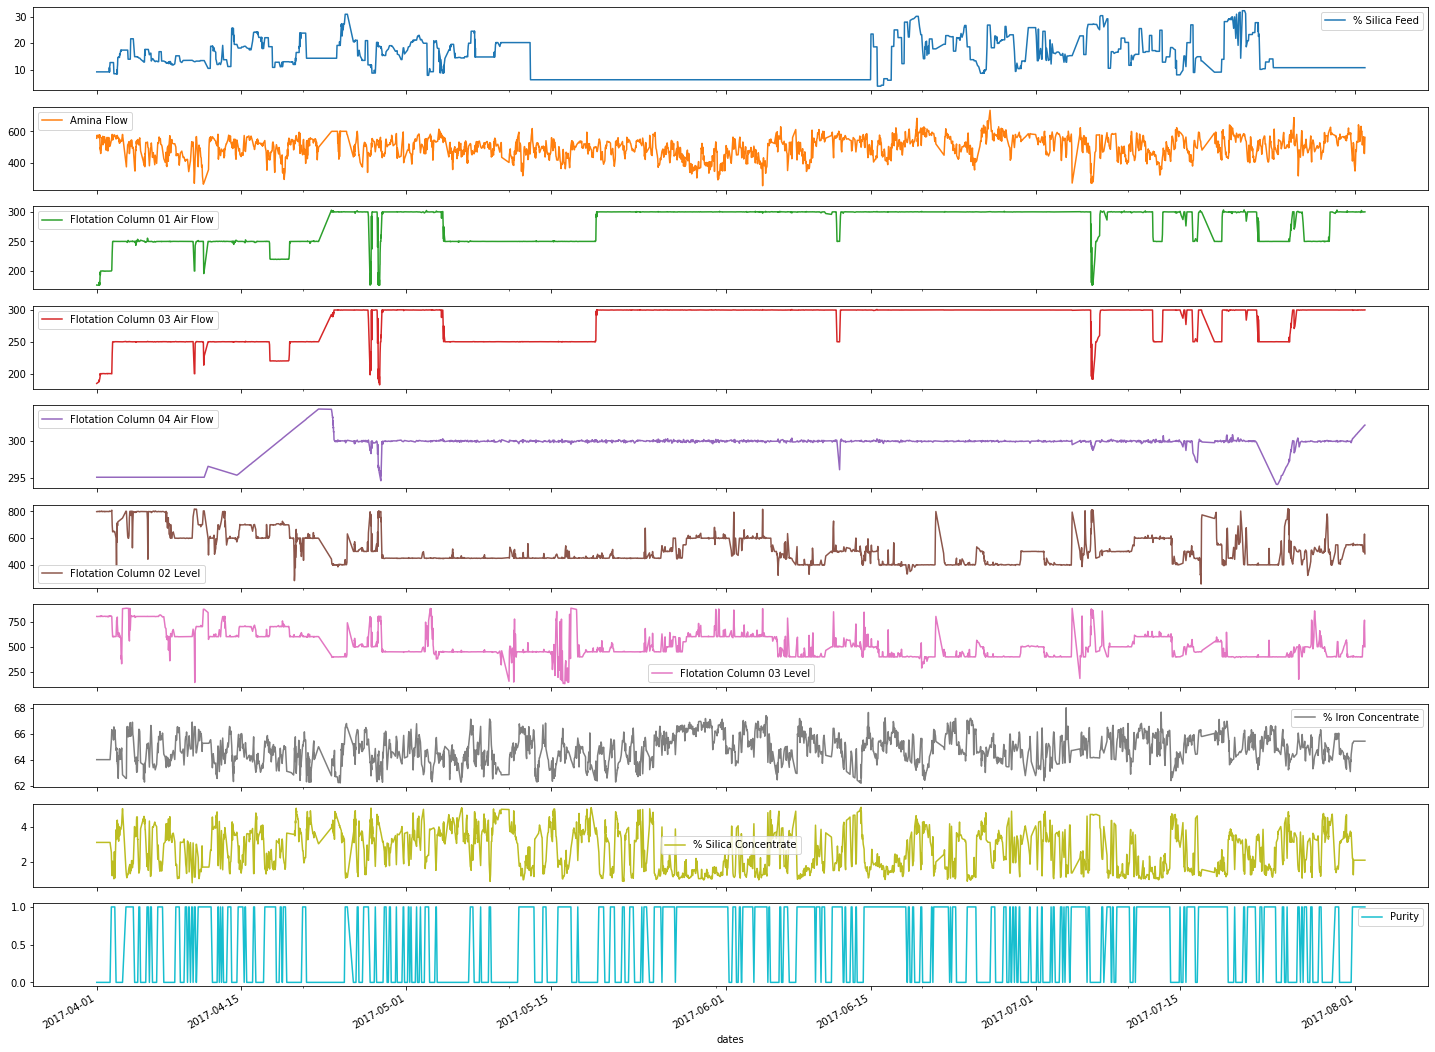

In [ ]:
df_cut = df['2017-04-01':'2017-08-01']

plot_cols = df_cut.columns
plot_features = df_cut[plot_cols]
plot_features.plot(subplots=True, figsize=(25,20));

In [ ]:
df_silica = df_cut[['% Silica Concentrate']]
df_silica.head()

,% Silica Concentrate
dates,
2017-04-01 00:00:00,3.11
2017-04-01 00:10:00,3.11
2017-04-01 01:00:00,3.11
2017-04-01 01:10:00,3.11
2017-04-01 02:00:00,3.11


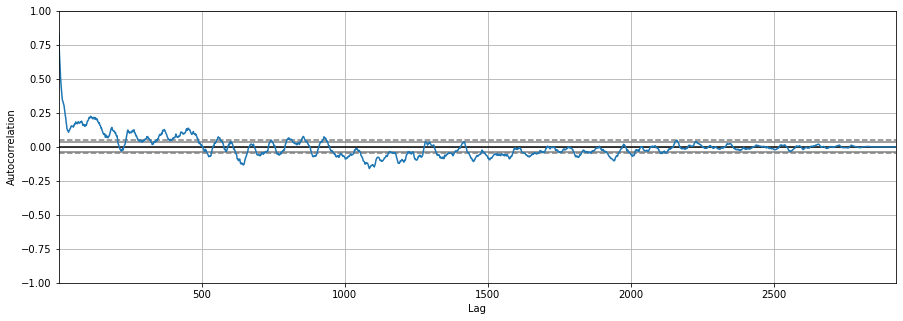

In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

rolmean = df_silica.rolling(window=12).mean()
rolstd = df_silica.rolling(window=12).std()

pyplot.figure(figsize=(15, 5))
autocorrelation_plot(df_silica)
pyplot.show()

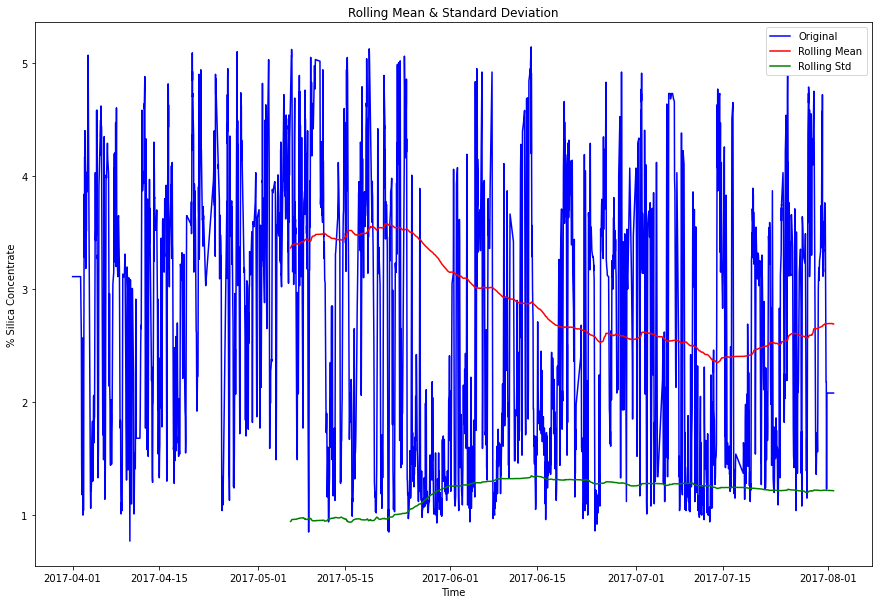

Results of Dickey-Fuller Test:
Test Statistic                -1.029997e+01
p-value                        3.392436e-18
#Lags Used                     3.000000e+00
Number of Observations Used    2.921000e+03
Critical Value (1%)           -3.432591e+00
Critical Value (5%)           -2.862530e+00
Critical Value (10%)          -2.567297e+00
dtype: float64
The timeseries is stationary at 95% level of confidence


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, rolling):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(rolling).mean()
    rolstd = timeseries.rolling(rolling).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15, 10))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')

    plt.xlabel('Time')
    plt.ylabel('% Silica Concentrate')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:') 
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput['p-value'] < 0.05:
        print('The timeseries is stationary at 95% level of confidence')
    else:
        print('The timeseries is not stationary at 95% level of confidence')
  

test_stationarity(df_cut['% Silica Concentrate'], rolling=1000)


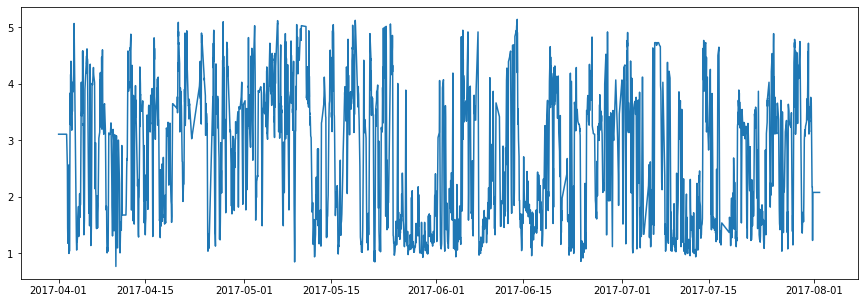

In [ ]:
pyplot.figure(figsize=(15, 5))
pyplot.plot(df_silica)
pyplot.show()

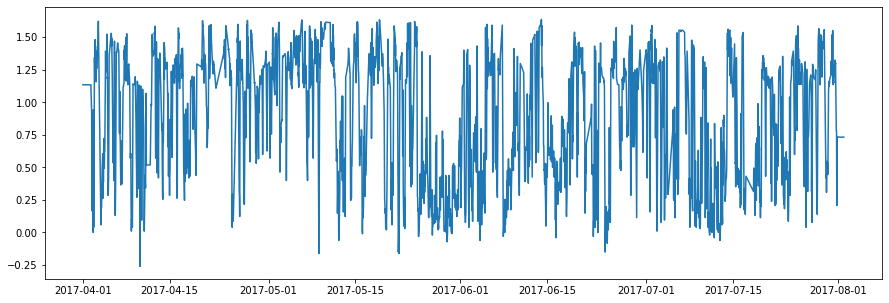

In [ ]:
#Estimate trend
pyplot.figure(figsize=(15, 5))

df_silica_logScale = np.log(df_silica)
plt.plot(df_silica_logScale)

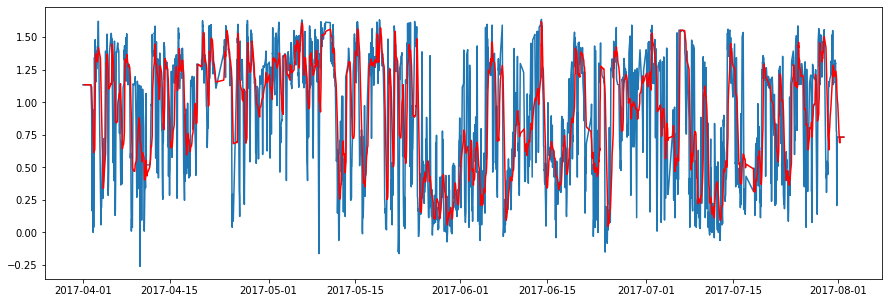

In [ ]:
#MA
pyplot.figure(figsize=(15, 5))

movingAverage = df_silica_logScale.rolling(window=12).mean()
movingStd = df_silica_logScale.rolling(window=12).std()
plt.plot(df_silica_logScale)
plt.plot(movingAverage,color='red')

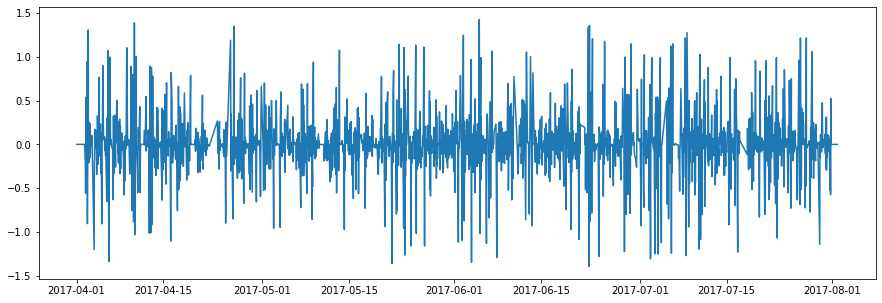

In [ ]:
pyplot.figure(figsize=(15, 5))

datasetLogDiffShifting  = df_silica_logScale-df_silica_logScale.shift()
plt.plot(datasetLogDiffShifting)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#MA Model

model = ARIMA(df_silica_logScale,order=(3,1,1))

# print(model)
result_ARIMA= model.fit(disp=-1)

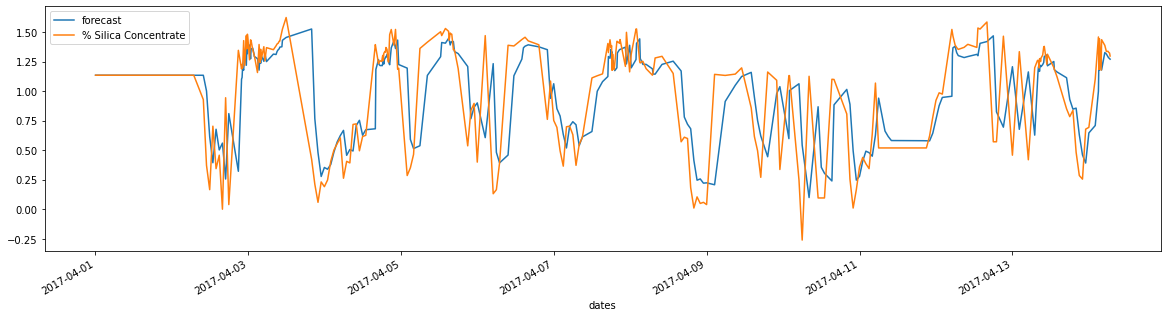

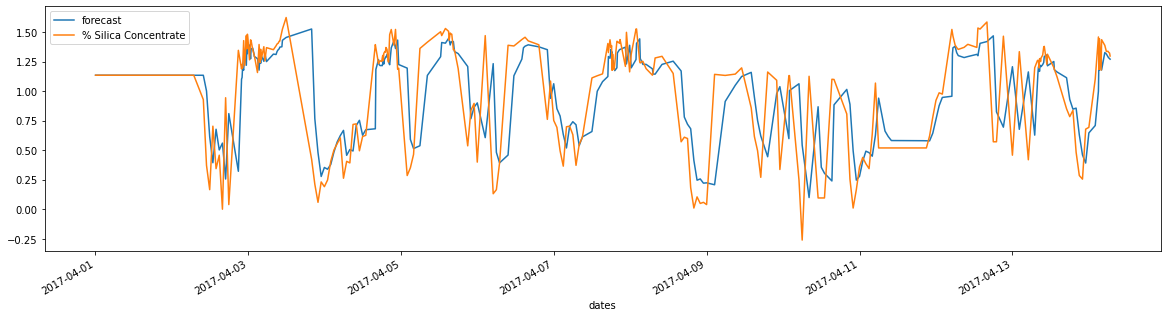

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
result_ARIMA.plot_predict(1,350, ax=ax)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X = df_silica_logScale.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(3,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)


Test RMSE: 0.306


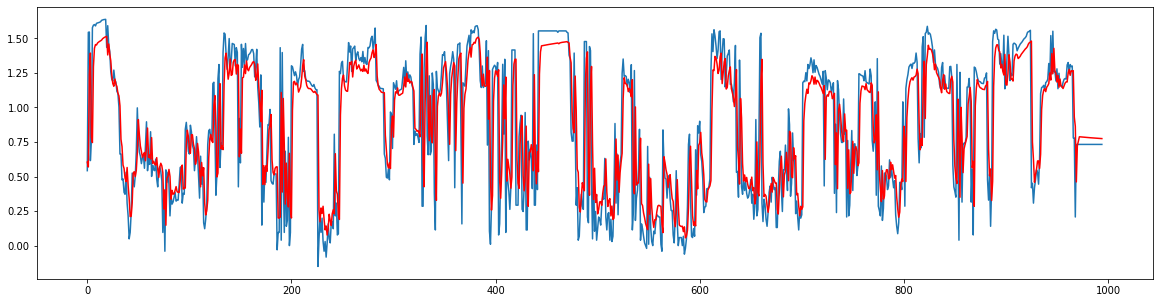

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

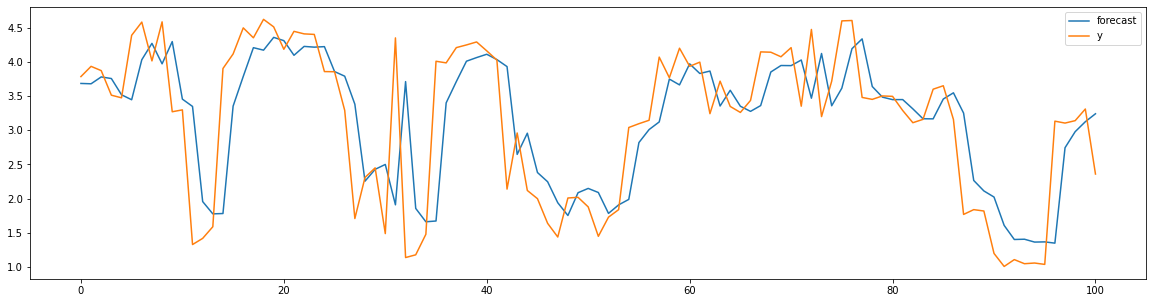

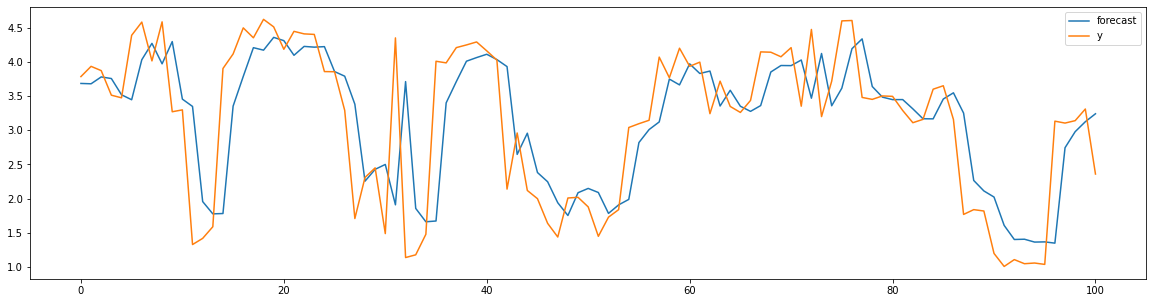

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#MA Model

model = ARIMA(train,order=(3,1,1))

# print(model)
result_ARIMA= model.fit(disp=-1)

fig, ax = plt.subplots(figsize=(20,5))
result_ARIMA.plot_predict(400,500, ax=ax)

In [ ]:
print(result_ARIMA.summary().tables[1])

                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -4.487e-05      0.000     -0.143      0.886      -0.001       0.001
ar.L1.D.% Silica Concentrate     0.6320      0.019     33.461      0.000       0.595       0.669
ar.L2.D.% Silica Concentrate     0.1285      0.022      5.895      0.000       0.086       0.171
ar.L3.D.% Silica Concentrate     0.0608      0.019      3.236      0.001       0.024       0.098
ma.L1.D.% Silica Concentrate    -0.9889      0.004   -253.589      0.000      -0.997      -0.981


In [ ]:
''' from pmdarima.arima import auto_arima

test = auto_arima(df_silica_logScale, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,             
                      d=1,          
                      seasonal=True,   
                      start_P=0, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True) 
                  
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=638.786, Time=2.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=980.251, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=773.754, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=702.893, Time=1.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=978.252, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=580.625, Time=9.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=725.083, Time=0.94 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=572.172, Time=10.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=675.918, Time=1.03 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=15.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=584.590, Time=6.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=575.923, Time=4.77 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=667.315, Time=0.66 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=576.369, Time=7.13 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=570.190, Time=1.33 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=578.639, Time=1.07 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=673.920, Time=0.23 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Time=1.98 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=582.606, Time=1.33 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=723.085, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=inf, Time=1.85 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=665.317, Time=0.28 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=inf, Time=3.79 sec

Best model:  ARIMA(3,1,1)(0,0,0)[0]          
Total fit time: 73.005 seconds
                  '''